# 01_Data_Visualization_XYZ(Quadril x Joelho)

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Objetivo: verificar o comportamento e se existe algum padrão em de cada voluntário nos 5 execicíos 

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Importando as Bibliotecas

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

É possível observar que os eixos X em ambos os gráficos apresentam grande oscilação, tornando sua utilização para a análise de compensação de movimento mais desafiadora.

## Graficos dos Eixos X, Y e Z do Quadril com o index temporal

In [6]:
import os
os.getcwd()

'c:\\Users\\Yama\\Documents\\Iniciação Científica\\Github\\movimento\\notebooks\\01_angulos_por_voluntario'

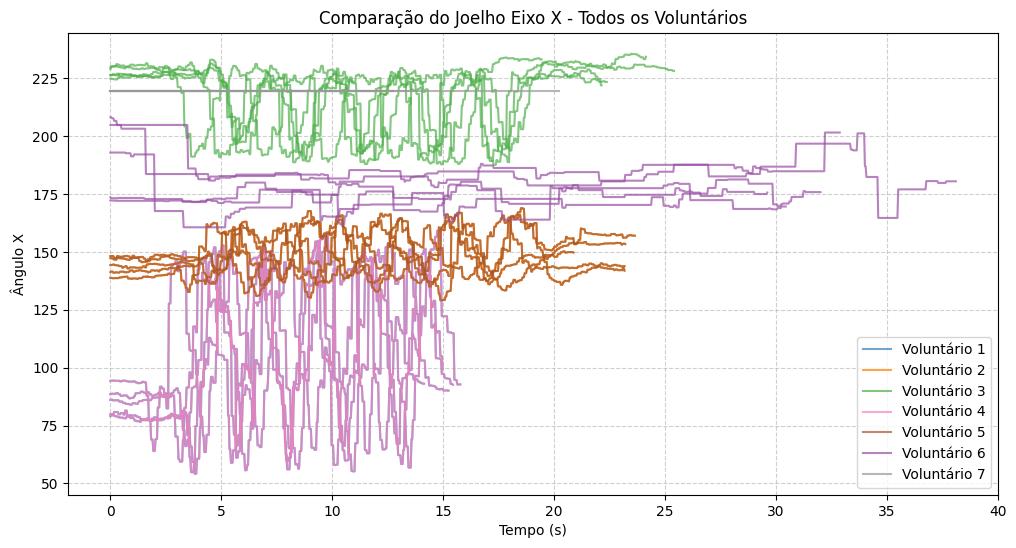

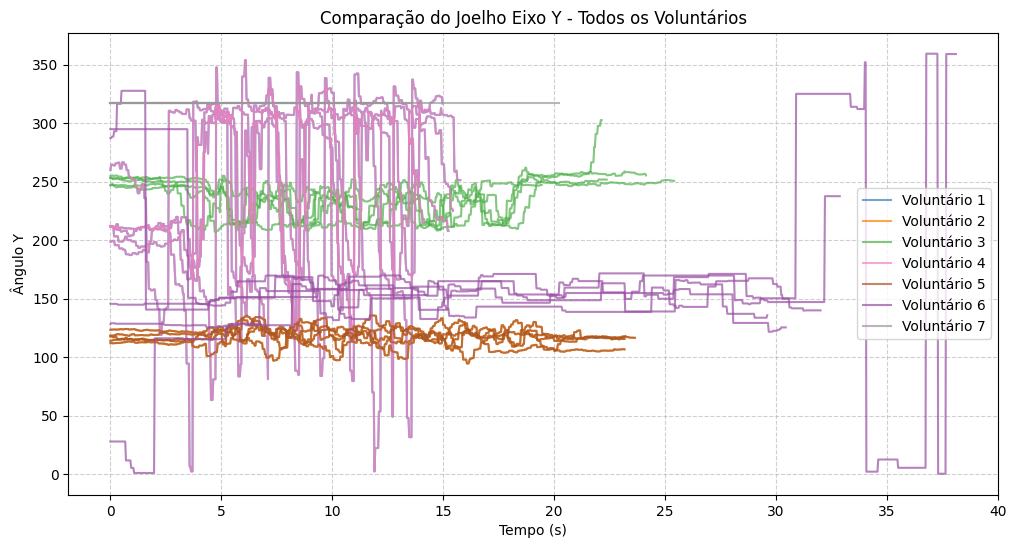

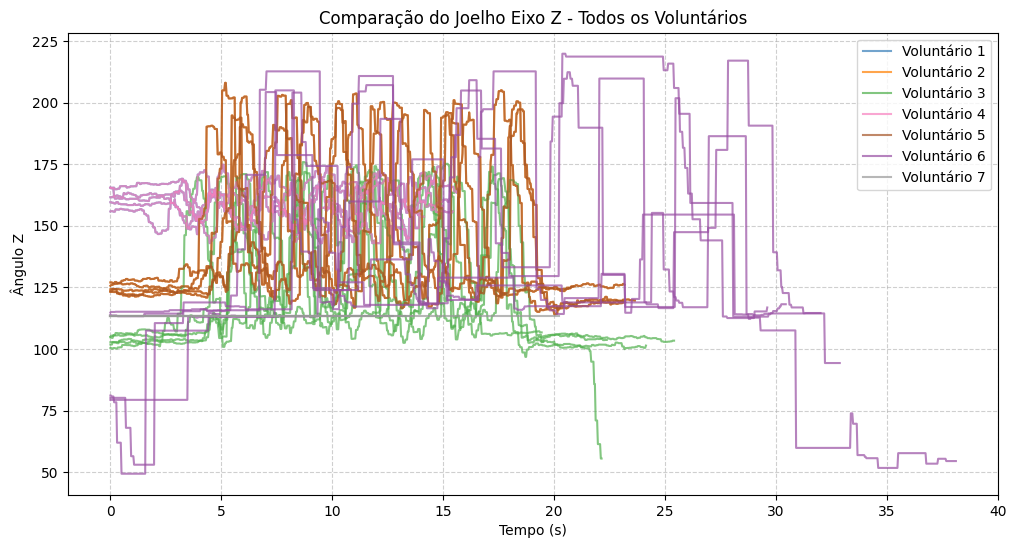

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Definir o caminho dos arquivos tratados
caminho_dados = "../../data/data_tratado/"  # Ajuste conforme necessário

# Lista de voluntários
voluntarios = [f"Voluntário {i}" for i in range(1, 8)]  # Voluntário 1 a 7

# Criar figuras para os gráficos de cada eixo (X, Y, Z)
fig_x, ax_x = plt.subplots(figsize=(12, 6))
fig_y, ax_y = plt.subplots(figsize=(12, 6))
fig_z, ax_z = plt.subplots(figsize=(12, 6))

# Definir cores para diferenciar voluntários
cores = ['#377eb8', '#ff7f00', '#4daf4a',
         '#f781bf', '#a65628', '#984ea3',
         '#999999', '#e41a1c', '#dede00']

# Processar cada voluntário
for idx, voluntario in enumerate(voluntarios):
    arquivos = sorted(glob.glob(f"{caminho_dados}/{voluntario}_Ex*.csv"))  # Encontrar os 5 exercícios
    
    if not arquivos:
        print(f" Nenhum arquivo encontrado para {voluntario}.")
        continue
    
    for arquivo in arquivos:
        df = pd.read_csv(arquivo, header=None)
        
        timestamp = df.iloc[:, -1]  # Última coluna (Tempo)
        joelho_x = df.iloc[:, 22]  # Ângulo do Joelho X
        joelho_y = df.iloc[:, 23]  # Ângulo do Joelho Y
        joelho_z = df.iloc[:, 24]  # Ângulo do Joelho Z
        
        cor = cores[idx % len(cores)]  # Definir cor para cada voluntário
        
        ax_x.plot(timestamp, joelho_x, label=voluntario if arquivo == arquivos[0] else "", color=cor, alpha=0.7)
        ax_y.plot(timestamp, joelho_y, label=voluntario if arquivo == arquivos[0] else "", color=cor, alpha=0.7)
        ax_z.plot(timestamp, joelho_z, label=voluntario if arquivo == arquivos[0] else "", color=cor, alpha=0.7)
    
# Configurar os gráficos
ax_x.set_title("Comparação do Joelho Eixo X - Todos os Voluntários")
ax_x.set_xlabel("Tempo (s)")
ax_x.set_ylabel("Ângulo X")
ax_x.grid(True, linestyle="--", alpha=0.6)
ax_x.legend()

ax_y.set_title("Comparação do Joelho Eixo Y - Todos os Voluntários")
ax_y.set_xlabel("Tempo (s)")
ax_y.set_ylabel("Ângulo Y")
ax_y.grid(True, linestyle="--", alpha=0.6)
ax_y.legend()

ax_z.set_title("Comparação do Joelho Eixo Z - Todos os Voluntários")
ax_z.set_xlabel("Tempo (s)")
ax_z.set_ylabel("Ângulo Z")
ax_z.grid(True, linestyle="--", alpha=0.6)
ax_z.legend()

# Mostrar gráficos
plt.show()

A análise dos exercícios realizados pelos voluntários 1 a 5 revelou um padrão consistente e contínuo no comportamento dos ângulos do joelho ao longo dos movimentos. No entanto, os voluntários 6 e 7 apresentaram variações significativamente distintas, caracterizando-se como outliers. Essas discrepâncias dificultam a identificação de tendências gerais, pois introduzem oscilações que desviam do comportamento observado nos demais participantes, comprometendo a clareza da visualização e análise dos dados.

## Visualizando Apenas 5 Voluntarios 


Removi dois pq estao ....

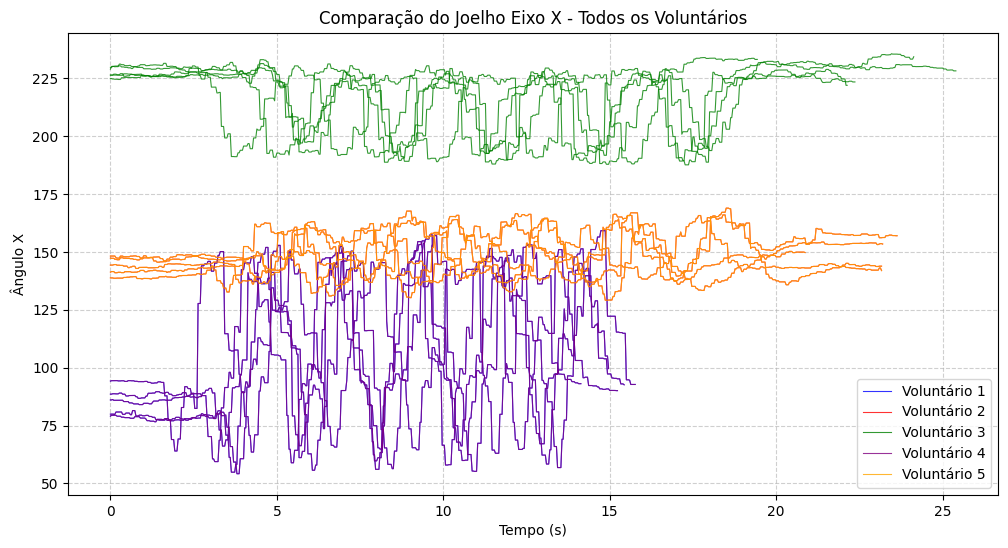

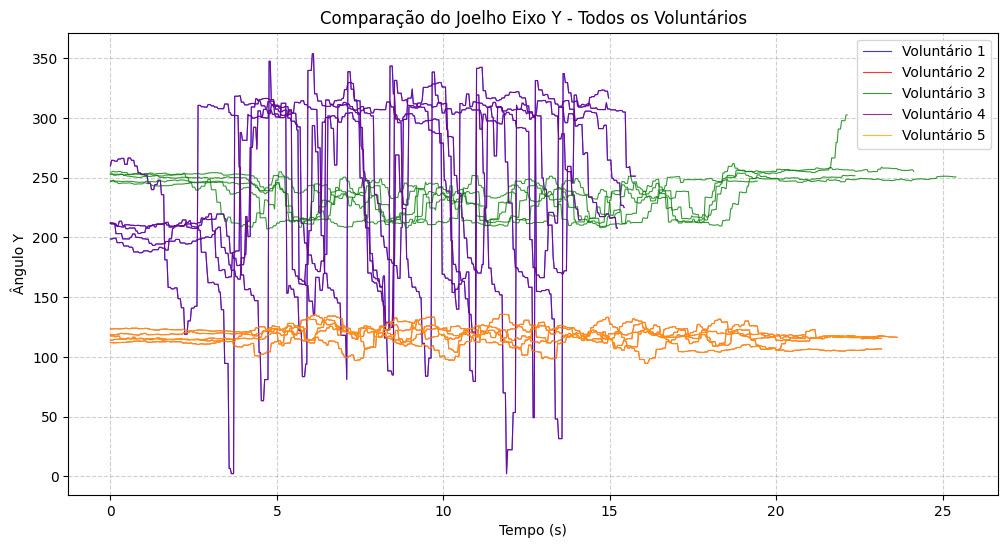

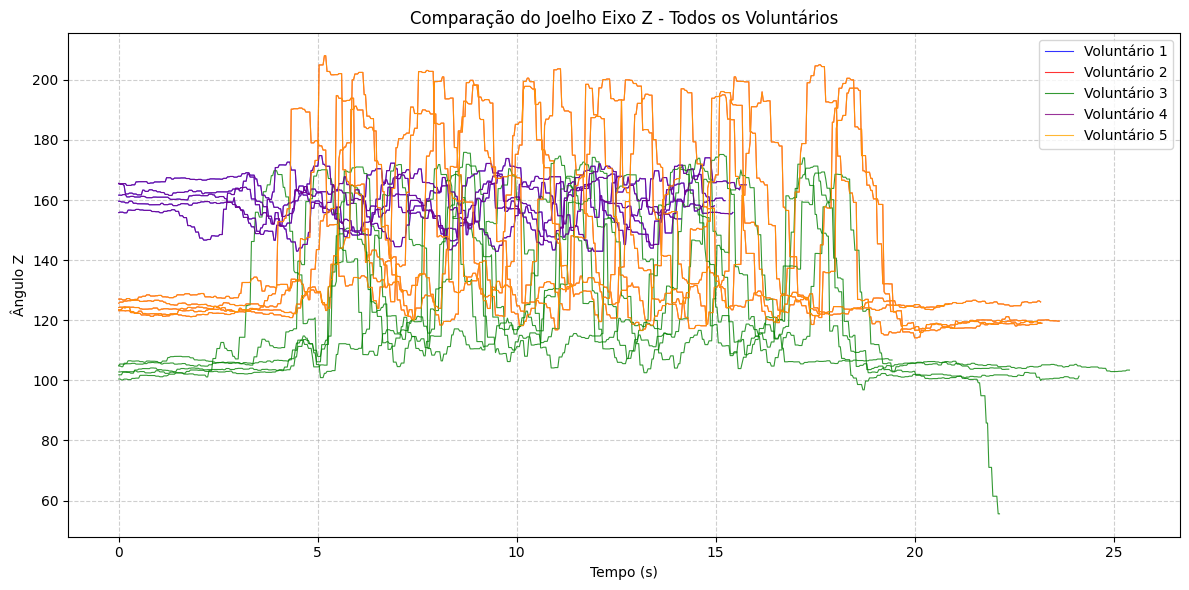

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Definir o caminho dos arquivos tratados
caminho_dados = "../../data/data_tratado"  # Ajuste conforme necessário

# Lista de voluntários (corrigido para incluir todos corretamente)
voluntarios = [f"Voluntário {i}" for i in range(1, 6)]  # Voluntário 1 a 5

# Criar figuras para os gráficos de cada eixo (X, Y, Z)
fig_x, ax_x = plt.subplots(figsize=(12, 6))
fig_y, ax_y = plt.subplots(figsize=(12, 6))
fig_z, ax_z = plt.subplots(figsize=(12, 6))

# Definir cores fixas para cada voluntário antes do loop
cores_fixas = ["blue", "red", "green", "purple", "orange"]
cores = {voluntario: cores_fixas[i] for i, voluntario in enumerate(voluntarios)}

# Processar cada voluntário
for voluntario in voluntarios:
    arquivos = sorted(glob.glob(f"{caminho_dados}/{voluntario}_Ex*.csv"))  # Encontrar os 5 exercícios
    
    if not arquivos:
        print(f" Nenhum arquivo encontrado para {voluntario}.")
        continue
    
    legenda_adicionada = False  # Garante que a legenda aparece apenas uma vez por voluntário
    
    for arquivo in arquivos:
        df = pd.read_csv(arquivo, header=None)
        
        timestamp = df.iloc[:, -1]  # Última coluna (Tempo)
        joelho_x = df.iloc[:, 22]  # Ângulo do Joelho X
        joelho_y = df.iloc[:, 23]  # Ângulo do Joelho Y
        joelho_z = df.iloc[:, 24]  # Ângulo do Joelho Z
        
        label = voluntario if not legenda_adicionada else ""
        legenda_adicionada = True  # Define a legenda apenas uma vez por voluntário
        cor = cores[voluntario]  # Obtém a cor fixa para o voluntário
        
        ax_x.plot(timestamp, joelho_x, label=label, color=cor, linewidth=0.8, alpha=0.8)  
        ax_y.plot(timestamp, joelho_y, label=label, color=cor, linewidth=0.8, alpha=0.8)
        ax_z.plot(timestamp, joelho_z, label=label, color=cor, linewidth=0.8, alpha=0.8)
    
    plt.draw()  # Atualiza os gráficos dinamicamente para evitar limitações

# Configurar os gráficos
ax_x.set_title("Comparação do Joelho Eixo X - Todos os Voluntários")
ax_x.set_xlabel("Tempo (s)")
ax_x.set_ylabel("Ângulo X")
ax_x.grid(True, linestyle="--", alpha=0.6)
ax_x.legend()

ax_y.set_title("Comparação do Joelho Eixo Y - Todos os Voluntários")
ax_y.set_xlabel("Tempo (s)")
ax_y.set_ylabel("Ângulo Y")
ax_y.grid(True, linestyle="--", alpha=0.6)
ax_y.legend()

ax_z.set_title("Comparação do Joelho Eixo Z - Todos os Voluntários")
ax_z.set_xlabel("Tempo (s)")
ax_z.set_ylabel("Ângulo Z")
ax_z.grid(True, linestyle="--", alpha=0.6)
ax_z.legend()

# Ajustar layout para melhor visualização
plt.tight_layout()

# Mostrar gráficos
plt.show()

Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.

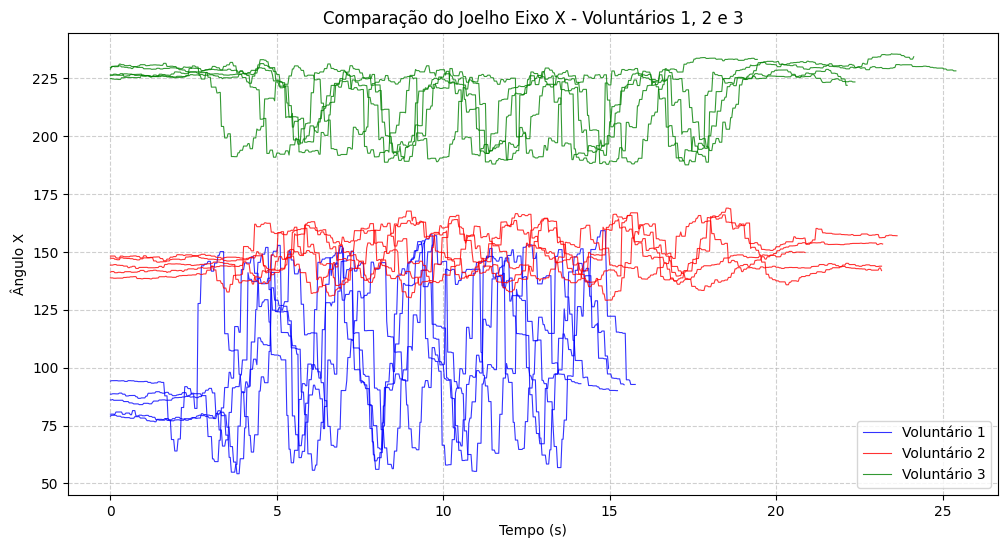

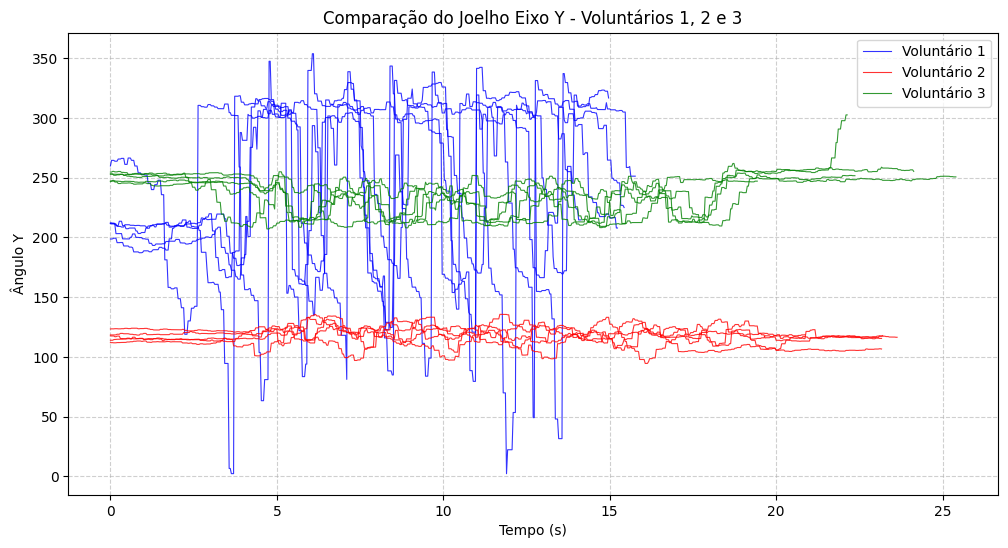

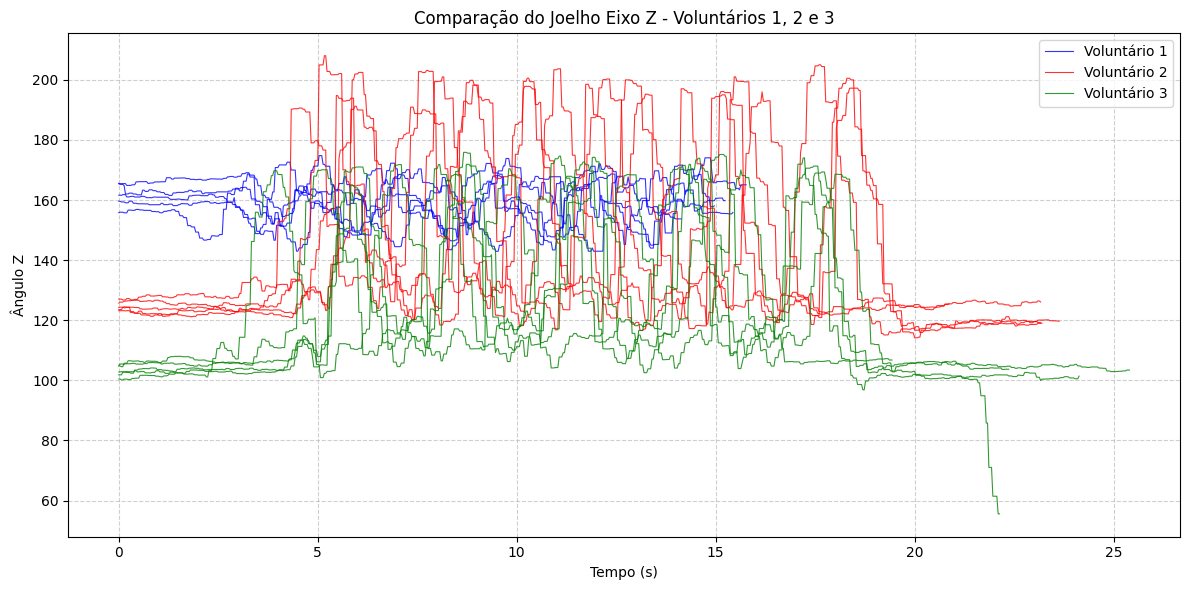

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Definir o caminho dos arquivos tratados
caminho_dados = "../../data/data_tratado"  # Ajuste conforme necessário

# Lista de voluntários (apenas 1, 2 e 3)
voluntarios = ["Voluntário 1", "Voluntário 2", "Voluntário 3"]

# Criar figuras para os gráficos de cada eixo (X, Y, Z)
fig_x, ax_x = plt.subplots(figsize=(12, 6))
fig_y, ax_y = plt.subplots(figsize=(12, 6))
fig_z, ax_z = plt.subplots(figsize=(12, 6))

# Definir cores fixas para cada voluntário antes do loop
cores_fixas = ["blue", "red", "green"]
cores = {voluntario: cores_fixas[i] for i, voluntario in enumerate(voluntarios)}

# Processar cada voluntário
for voluntario in voluntarios:
    arquivos = sorted(glob.glob(f"{caminho_dados}/{voluntario}_Ex*.csv"))  # Encontrar os 5 exercícios
    
    if not arquivos:
        print(f" Nenhum arquivo encontrado para {voluntario}.")
        continue
    
    legenda_adicionada = False  # Garante que a legenda aparece apenas uma vez por voluntário
    
    for arquivo in arquivos:
        df = pd.read_csv(arquivo, header=None)
        
        timestamp = df.iloc[:, -1]  # Última coluna (Tempo)
        joelho_x = df.iloc[:, 22]  # Ângulo do Joelho X
        joelho_y = df.iloc[:, 23]  # Ângulo do Joelho Y
        joelho_z = df.iloc[:, 24]  # Ângulo do Joelho Z
        
        label = voluntario if not legenda_adicionada else ""
        legenda_adicionada = True  # Define a legenda apenas uma vez por voluntário
        cor = cores[voluntario]  # Obtém a cor fixa para o voluntário
        
        ax_x.plot(timestamp, joelho_x, label=label, color=cor, linewidth=0.8, alpha=0.8)  
        ax_y.plot(timestamp, joelho_y, label=label, color=cor, linewidth=0.8, alpha=0.8)
        ax_z.plot(timestamp, joelho_z, label=label, color=cor, linewidth=0.8, alpha=0.8)
    
    plt.draw()  # Atualiza os gráficos dinamicamente para evitar limitações

# Configurar os gráficos
ax_x.set_title("Comparação do Joelho Eixo X - Voluntários 1, 2 e 3")
ax_x.set_xlabel("Tempo (s)")
ax_x.set_ylabel("Ângulo X")
ax_x.grid(True, linestyle="--", alpha=0.6)
ax_x.legend()

ax_y.set_title("Comparação do Joelho Eixo Y - Voluntários 1, 2 e 3")
ax_y.set_xlabel("Tempo (s)")
ax_y.set_ylabel("Ângulo Y")
ax_y.grid(True, linestyle="--", alpha=0.6)
ax_y.legend()

ax_z.set_title("Comparação do Joelho Eixo Z - Voluntários 1, 2 e 3")
ax_z.set_xlabel("Tempo (s)")
ax_z.set_ylabel("Ângulo Z")
ax_z.grid(True, linestyle="--", alpha=0.6)
ax_z.legend()

# Ajustar layout para melhor visualização
plt.tight_layout()

# Mostrar gráficos
plt.show()

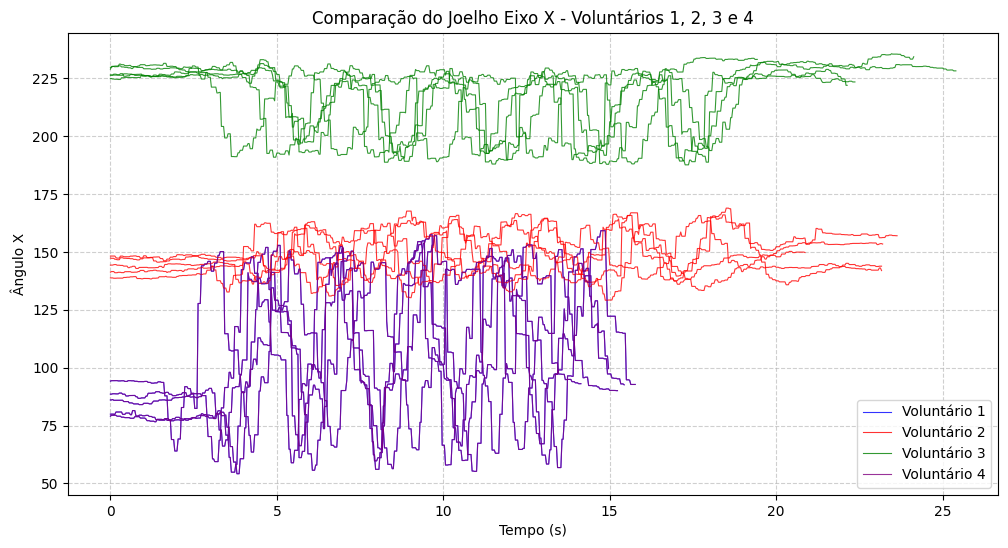

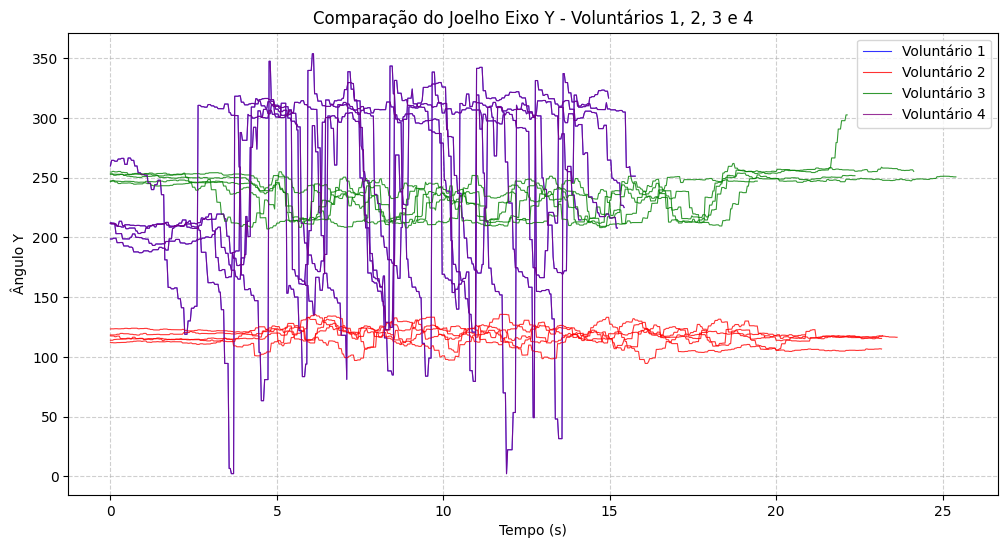

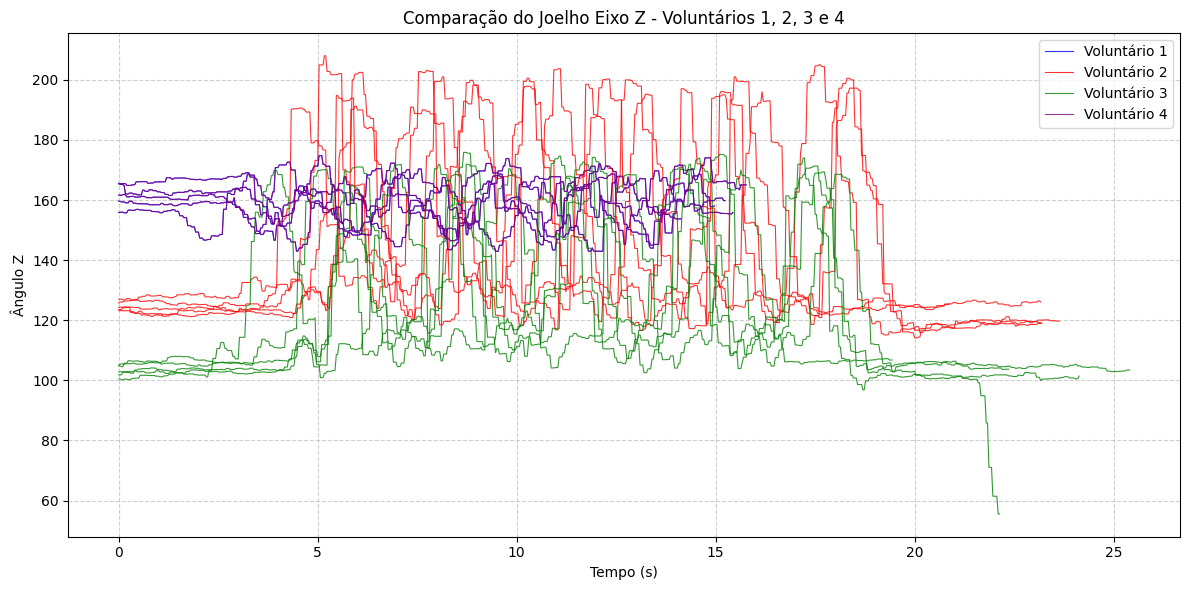

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Definir o caminho dos arquivos tratados
caminho_dados = "../../data/data_tratado"  # Ajuste conforme necessário

# Lista de voluntários (agora 1, 2, 3 e 4)
voluntarios = ["Voluntário 1", "Voluntário 2", "Voluntário 3", "Voluntário 4"]

# Criar figuras para os gráficos de cada eixo (X, Y, Z)
fig_x, ax_x = plt.subplots(figsize=(12, 6))
fig_y, ax_y = plt.subplots(figsize=(12, 6))
fig_z, ax_z = plt.subplots(figsize=(12, 6))

# Definir cores fixas para cada voluntário antes do loop
cores_fixas = ["blue", "red", "green", "purple"]
cores = {voluntario: cores_fixas[i] for i, voluntario in enumerate(voluntarios)}

# Processar cada voluntário
for voluntario in voluntarios:
    arquivos = sorted(glob.glob(f"{caminho_dados}/{voluntario}_Ex*.csv"))  # Encontrar os 5 exercícios
    
    if not arquivos:
        print(f" Nenhum arquivo encontrado para {voluntario}.")
        continue
    
    legenda_adicionada = False  # Garante que a legenda aparece apenas uma vez por voluntário
    
    for arquivo in arquivos:
        df = pd.read_csv(arquivo, header=None)
        
        timestamp = df.iloc[:, -1]  # Última coluna (Tempo)
        joelho_x = df.iloc[:, 22]  # Ângulo do Joelho X
        joelho_y = df.iloc[:, 23]  # Ângulo do Joelho Y
        joelho_z = df.iloc[:, 24]  # Ângulo do Joelho Z
        
        label = voluntario if not legenda_adicionada else ""
        legenda_adicionada = True  # Define a legenda apenas uma vez por voluntário
        cor = cores[voluntario]  # Obtém a cor fixa para o voluntário
        
        ax_x.plot(timestamp, joelho_x, label=label, color=cor, linewidth=0.8, alpha=0.8)  
        ax_y.plot(timestamp, joelho_y, label=label, color=cor, linewidth=0.8, alpha=0.8)
        ax_z.plot(timestamp, joelho_z, label=label, color=cor, linewidth=0.8, alpha=0.8)
    
    plt.draw()  # Atualiza os gráficos dinamicamente para evitar limitações

# Configurar os gráficos
ax_x.set_title("Comparação do Joelho Eixo X - Voluntários 1, 2, 3 e 4")
ax_x.set_xlabel("Tempo (s)")
ax_x.set_ylabel("Ângulo X")
ax_x.grid(True, linestyle="--", alpha=0.6)
ax_x.legend()

ax_y.set_title("Comparação do Joelho Eixo Y - Voluntários 1, 2, 3 e 4")
ax_y.set_xlabel("Tempo (s)")
ax_y.set_ylabel("Ângulo Y")
ax_y.grid(True, linestyle="--", alpha=0.6)
ax_y.legend()

ax_z.set_title("Comparação do Joelho Eixo Z - Voluntários 1, 2, 3 e 4")
ax_z.set_xlabel("Tempo (s)")
ax_z.set_ylabel("Ângulo Z")
ax_z.grid(True, linestyle="--", alpha=0.6)
ax_z.legend()

# Ajustar layout para melhor visualização
plt.tight_layout()

# Mostrar gráficos
plt.show()

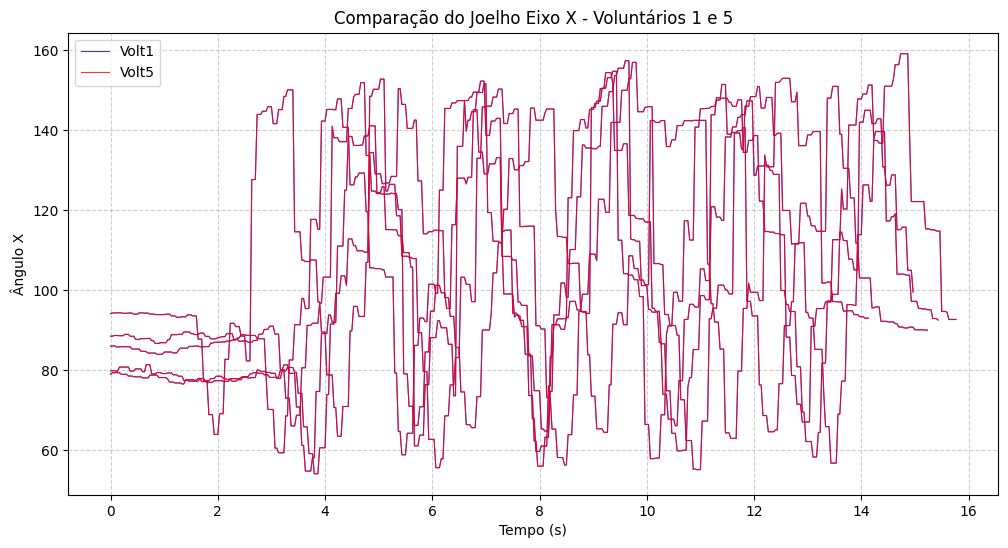

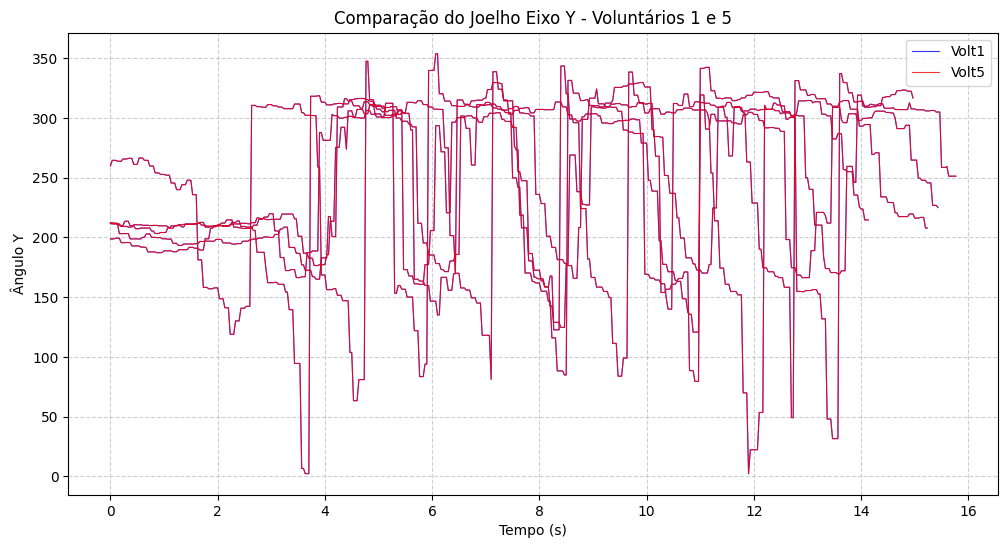

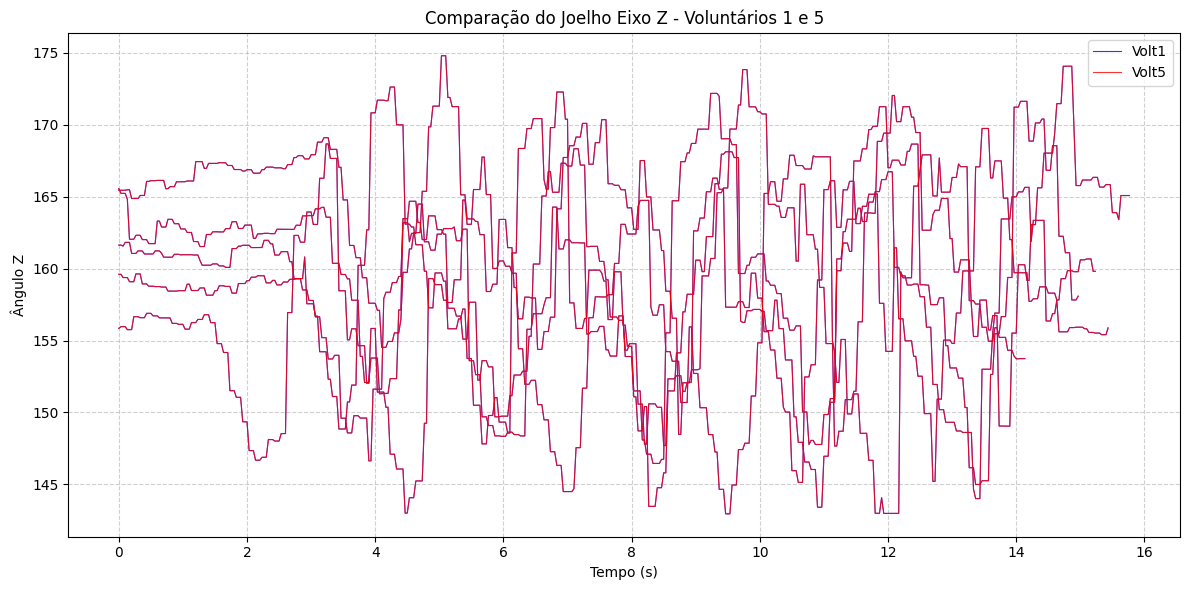

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

# Definir o caminho dos arquivos tratados
caminho_dados = "../new_data"  # Ajuste conforme necessário

# Lista de voluntários (agora 1 e 4)
voluntarios = ["Volt1", "Volt5"]

# Criar figuras para os gráficos de cada eixo (X, Y, Z)
fig_x, ax_x = plt.subplots(figsize=(12, 6))
fig_y, ax_y = plt.subplots(figsize=(12, 6))
fig_z, ax_z = plt.subplots(figsize=(12, 6))

# Definir cores fixas para cada voluntário antes do loop
cores_fixas = ["blue", "red"]
cores = {voluntario: cores_fixas[i] for i, voluntario in enumerate(voluntarios)}

# Processar cada voluntário
for voluntario in voluntarios:
    arquivos = sorted(glob.glob(f"{caminho_dados}/{voluntario}_ex*.csv"))  # Encontrar os 5 exercícios
    
    if not arquivos:
        print(f"⚠️ Nenhum arquivo encontrado para {voluntario}.")
        continue
    
    legenda_adicionada = False  # Garante que a legenda aparece apenas uma vez por voluntário
    
    for arquivo in arquivos:
        df = pd.read_csv(arquivo, header=None)
        
        timestamp = df.iloc[:, -1]  # Última coluna (Tempo)
        joelho_x = df.iloc[:, 22]  # Ângulo do Joelho X
        joelho_y = df.iloc[:, 23]  # Ângulo do Joelho Y
        joelho_z = df.iloc[:, 24]  # Ângulo do Joelho Z
        
        label = voluntario if not legenda_adicionada else ""
        legenda_adicionada = True  # Define a legenda apenas uma vez por voluntário
        cor = cores[voluntario]  # Obtém a cor fixa para o voluntário
        
        ax_x.plot(timestamp, joelho_x, label=label, color=cor, linewidth=0.8, alpha=0.8)  
        ax_y.plot(timestamp, joelho_y, label=label, color=cor, linewidth=0.8, alpha=0.8)
        ax_z.plot(timestamp, joelho_z, label=label, color=cor, linewidth=0.8, alpha=0.8)
    
    plt.draw()  # Atualiza os gráficos dinamicamente para evitar limitações

# Configurar os gráficos
ax_x.set_title("Comparação do Joelho Eixo X - Voluntários 1 e 5")
ax_x.set_xlabel("Tempo (s)")
ax_x.set_ylabel("Ângulo X")
ax_x.grid(True, linestyle="--", alpha=0.6)
ax_x.legend()

ax_y.set_title("Comparação do Joelho Eixo Y - Voluntários 1 e 5")
ax_y.set_xlabel("Tempo (s)")
ax_y.set_ylabel("Ângulo Y")
ax_y.grid(True, linestyle="--", alpha=0.6)
ax_y.legend()

ax_z.set_title("Comparação do Joelho Eixo Z - Voluntários 1 e 5")
ax_z.set_xlabel("Tempo (s)")
ax_z.set_ylabel("Ângulo Z")
ax_z.grid(True, linestyle="--", alpha=0.6)
ax_z.legend()

# Ajustar layout para melhor visualização
plt.tight_layout()

# Mostrar gráficos
plt.show()


# Conclusões

#### A análise realizada foi eficiente, permitindo identificar que os voluntários 6 e 7 se comportam como outliers no conjunto de dados, o que levou à decisão de realizar uma análise mais aprofundada focada nos voluntários de 1 a 5. Durante essa análise, foi possível detectar um problema de clonagem nos dados, onde os voluntários apresentaram informações idênticas, indicando que os dados desses voluntários foram copiados erroneamente. Para contornar esse obstáculo e garantir a integridade da análise, sugere-se que seja feita uma revisão cuidadosa dos dados originais para corrigir esses erros de duplicação, além de implementar métodos de verificação mais rigorosos no processo de coleta e entrada de dados, como a validação automática de registros e a exclusão de duplicatas antes da análise final.